In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, f1_score, precision_score,
    recall_score, confusion_matrix, RocCurveDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Reading Dataset
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('dataset_A_training.csv')
df.head()


Saving dataset_A_training.csv to dataset_A_training (1).csv


,respondent_id,flu_concern,flu_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,employment_sector,seasonal_vaccine
0,1,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,Non-MSA,0.0,0.0,entertainment,0
1,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Male,NaN,Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,real_estate,0
2,3,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,Male,"> $75,000",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,NaN,0
3,4,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,2.0,utilities,1
4,5,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Not Principle City",2.0,0.0,NaN,0


In [ ]:
#Dataset summary

#Quick structure overview
print("Dataset Summary")
print("="*60)
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}\n")

#Display column names
print("Column Names:")
print(list(df.columns))
print("\n")

#Data types and non-null counts
print("Data Types and Non-Null Counts:")
print(df.info())

#Missing value summary
print("\nMissing Values Summary:")
print(df.isnull().sum().sort_values(ascending=False).head(15))

#Quick descriptive statistics for numeric columns
print("\n📊Descriptive Statistics (Numeric Columns):")
display(df.describe().T)


Dataset Summary
Number of rows: 4756
Number of columns: 31

Column Names:
['respondent_id', 'flu_concern', 'flu_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa', 'household_adults', 'household_children', 'employment_sector', 'seasonal_vaccine']


Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id             

,count,mean,std,min,25%,50%,75%,max
respondent_id,4756.0,2378.500000,1373.083270,1.0,1189.75,2378.5,3567.25,4756.0
flu_concern,4744.0,1.643128,0.919810,0.0,1.00,2.0,2.00,3.0
flu_knowledge,4733.0,1.293049,0.618902,0.0,1.00,1.0,2.00,2.0
behavioral_antiviral_meds,4742.0,0.052299,0.222652,0.0,0.00,0.0,0.00,1.0
behavioral_avoidance,4724.0,0.734124,0.441846,0.0,0.00,1.0,1.00,1.0
behavioral_face_mask,4753.0,0.073848,0.261551,0.0,0.00,0.0,0.00,1.0
behavioral_wash_hands,4748.0,0.836563,0.369803,0.0,1.00,1.0,1.00,1.0
behavioral_large_gatherings,4747.0,0.365494,0.481619,0.0,0.00,0.0,1.00,1.0
behavioral_outside_home,4747.0,0.336634,0.472608,0.0,0.00,0.0,1.00,1.0
behavioral_touch_face,4737.0,0.688410,0.463192,0.0,0.00,1.0,1.00,1.0


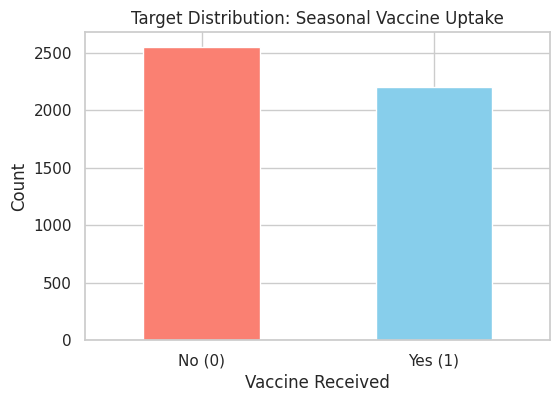


Target distribution:
seasonal_vaccine
1    53.64%
0    46.36%
Name: proportion, dtype: object


In [ ]:
#BASIC EDA & VISUALIZATION

#Set style
sns.set(style="whitegrid")

#Target Variable Distribution
target = "seasonal_vaccine"

plt.figure(figsize=(6,4))
df[target].value_counts().plot(kind="bar", color=["salmon","skyblue"])
plt.title("Target Distribution: Seasonal Vaccine Uptake")
plt.xticks(ticks=[0,1], labels=["No (0)", "Yes (1)"], rotation=0)
plt.ylabel("Count")
plt.xlabel("Vaccine Received")
plt.show()

print("\nTarget distribution:")
print(df[target].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')


/tmp/ipython-input-86711880.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette="mako")


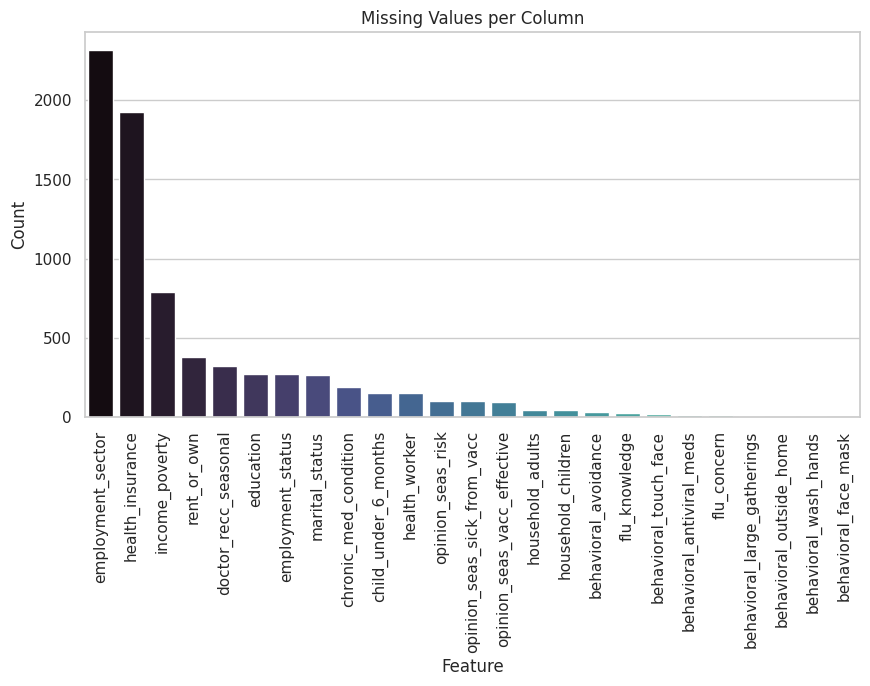

In [ ]:
#Missing Values Visualization
missing = df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if not missing.empty:
    plt.figure(figsize=(10,5))
    sns.barplot(x=missing.index, y=missing.values, palette="mako")
    plt.xticks(rotation=90)
    plt.title("Missing Values per Column")
    plt.ylabel("Count")
    plt.xlabel("Feature")
    plt.show()
else:
    print("\nNo missing values detected!")

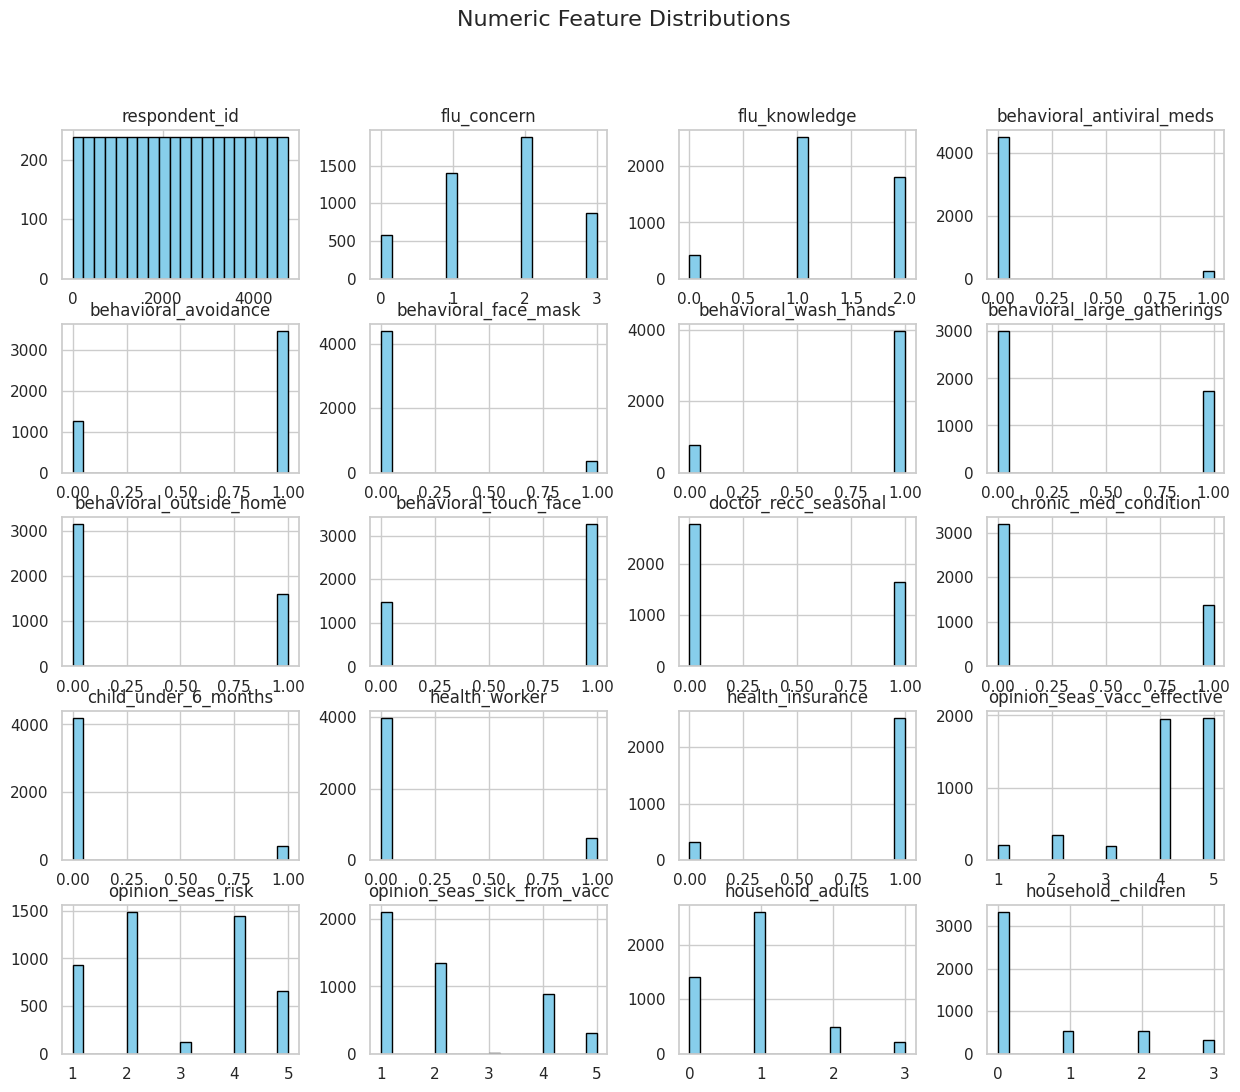

In [ ]:
#Numeric Feature Distributions
num_cols = df.select_dtypes(include=np.number).columns.drop(target)

df[num_cols].hist(figsize=(15,12), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Numeric Feature Distributions", fontsize=16)
plt.show()


Found 10 categorical columns. Displaying top 6:


/tmp/ipython-input-2038719314.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=c, palette="Set2")


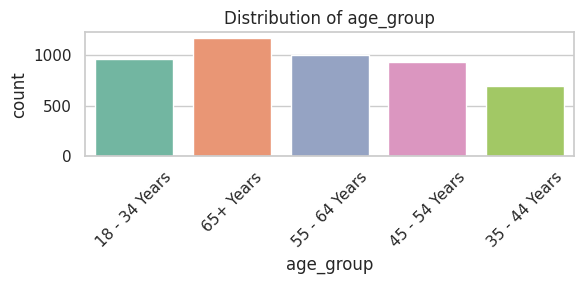

/tmp/ipython-input-2038719314.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=c, palette="Set2")


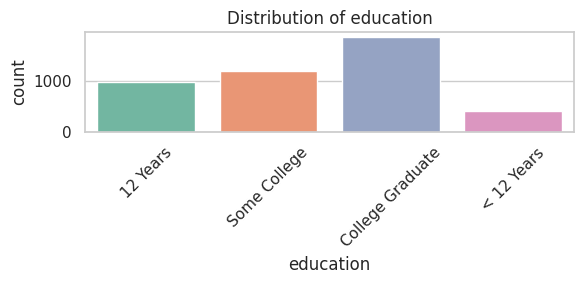

/tmp/ipython-input-2038719314.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=c, palette="Set2")


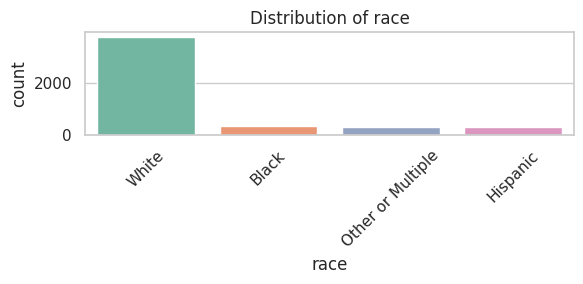

/tmp/ipython-input-2038719314.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=c, palette="Set2")


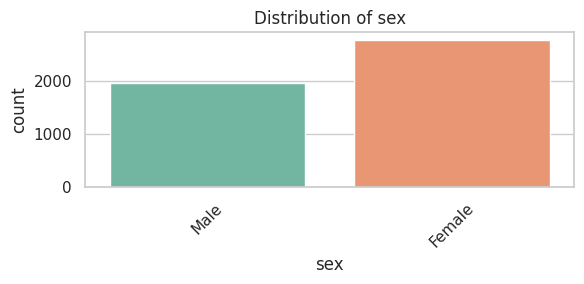

/tmp/ipython-input-2038719314.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=c, palette="Set2")


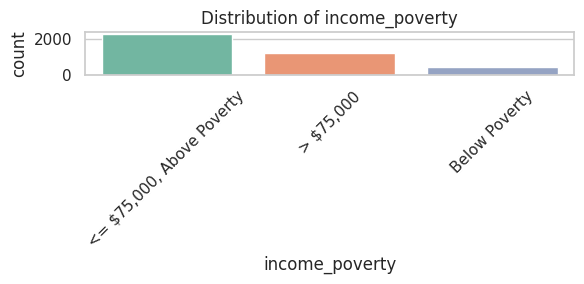

/tmp/ipython-input-2038719314.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=c, palette="Set2")


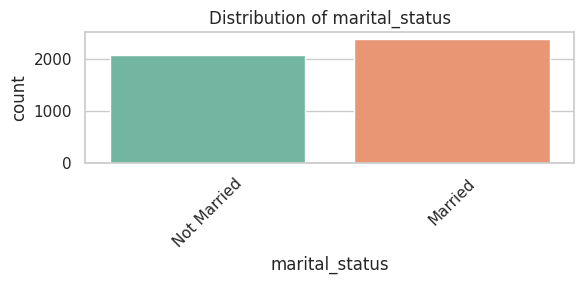

In [ ]:
#Categorical Feature Frequency (Top 6 for overview)
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print(f"\nFound {len(cat_cols)} categorical columns. Displaying top 6:")

for c in cat_cols[:6]:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=c, palette="Set2")
    plt.title(f"Distribution of {c}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

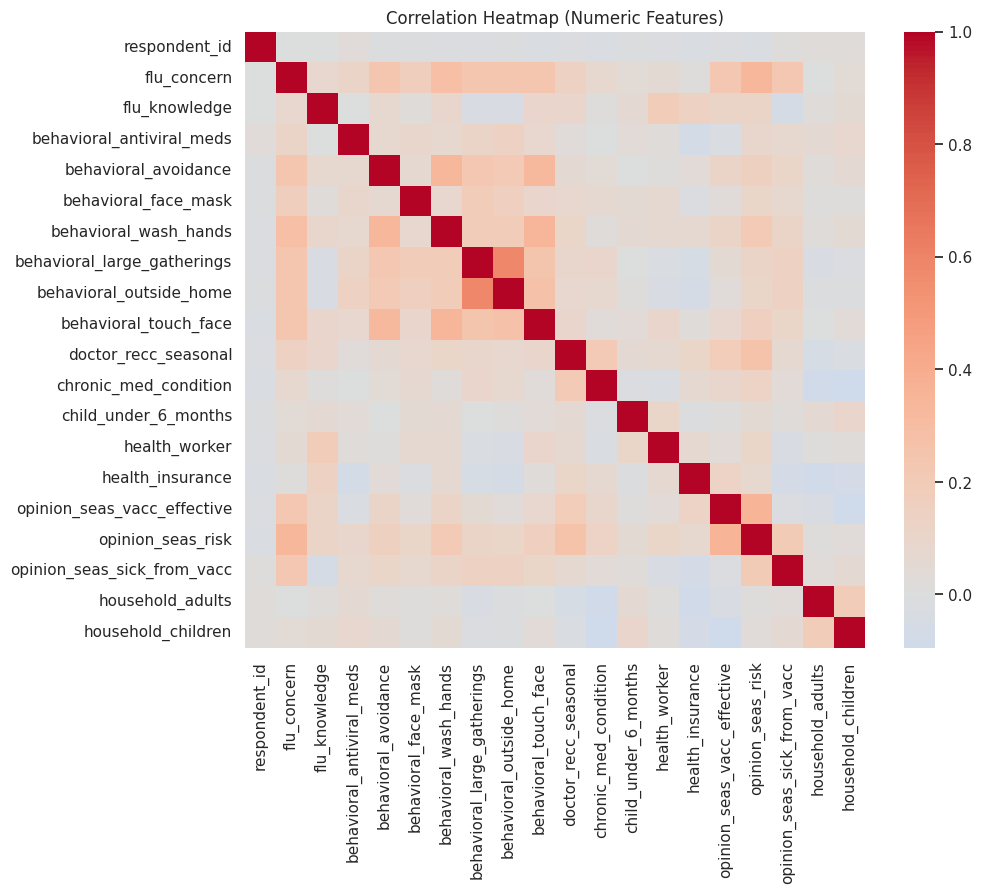

In [ ]:
#Correlation Heatmap (Numerical Features Only)
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [ ]:
#DATA PREPROCESSING FOR MODEL TRAINING

#Define target and features
target = 'seasonal_vaccine'
X = df.drop(columns=[target])
y = df[target]

print(f"Features: {X.shape[1]} | Target: {target}")

#dentify feature groups based on data type
nominal_cols = [
    'sex','race','marital_status','employment_industry','employment_occupation'
]
ordinal_cols = [
    'h1n1_concern','h1n1_knowledge',
    'opinion_seas_vacc_effective','opinion_seas_risk',
    'opinion_seas_sick_from_vacc','education','income_poverty'
]
binary_cols = [
    'behavioral_antiviral_meds','behavioral_avoidance',
    'behavioral_face_mask','behavioral_wash_hands',
    'doctor_recc_h1n1','doctor_recc_seasonal',
    'chronic_med_condition','child_under_6_months','health_worker'
]
ratio_cols = ['household_children','household_adults']

#Make sure only columns present in df are used
nominal_cols = [c for c in nominal_cols if c in X.columns]
ordinal_cols = [c for c in ordinal_cols if c in X.columns]
binary_cols = [c for c in binary_cols if c in X.columns]
ratio_cols = [c for c in ratio_cols if c in X.columns]

#Define transformations

# Impute + scale numeric (ratio) columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#Impute + encode ordinal columns
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

#Impute + encode nominal (categorical) columns
nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

#Impute binary columns (no encoding needed)
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

#Combine all transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ratio_cols),
        ('ord', ordinal_transformer, ordinal_cols),
        ('nom', nominal_transformer, nominal_cols),
        ('bin', binary_transformer, binary_cols)
    ]
)

#Train/Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Train size: {X_train.shape}, Validation size: {X_valid.shape}")

#Test the preprocessing pipeline
X_train_prep = preprocessor.fit_transform(X_train)
X_valid_prep = preprocessor.transform(X_valid)

print("\nPreprocessing Complete!")
print("Transformed train shape:", X_train_prep.shape)
print("Transformed validation shape:", X_valid_prep.shape)


Features: 30 | Target: seasonal_vaccine
Train size: (3804, 30), Validation size: (952, 30)

Preprocessing Complete!
Transformed train shape: (3804, 23)
Transformed validation shape: (952, 23)


In [ ]:

#RANDOM FOREST TRAINING

#Define and Train the Model
rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced',
    max_depth=None,
    n_jobs=-1
)

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", rf_model)
])

rf_pipe.fit(X_train, y_train)
print("Random Forest model training complete!\n")

Random Forest model training complete!



In [ ]:
#Evaluate on Validation Set
rf_probs = rf_pipe.predict_proba(X_valid)[:, 1]
rf_preds = (rf_probs >= 0.5).astype(int)

roc = roc_auc_score(y_valid, rf_probs)
acc = accuracy_score(y_valid, rf_preds)
f1 = f1_score(y_valid, rf_preds)
prec = precision_score(y_valid, rf_preds)
rec = recall_score(y_valid, rf_preds)

print("RANDOM FOREST PERFORMANCE")
print(f"ROC-AUC: {roc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")


RANDOM FOREST PERFORMANCE
ROC-AUC: 0.8106
Accuracy: 0.7647
F1 Score: 0.7800
Precision: 0.7830
Recall: 0.7769


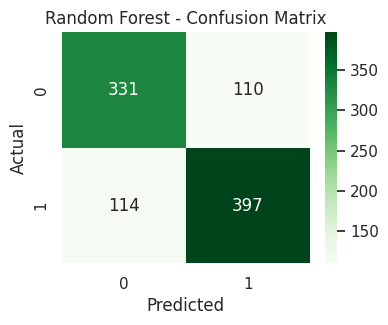

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_valid, rf_preds)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

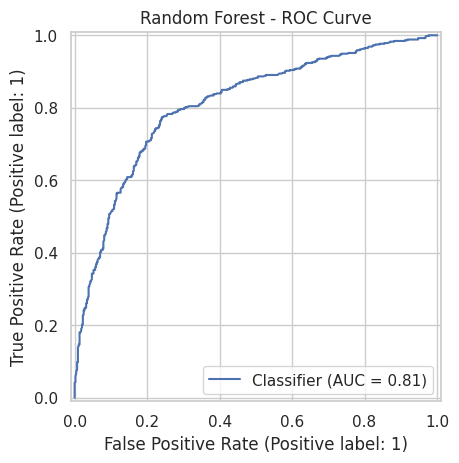

In [ ]:
#ROC Curve
RocCurveDisplay.from_predictions(y_valid, rf_probs)
plt.title("Random Forest - ROC Curve")
plt.show()


In [ ]:
#Save Results in a DataFrame for Reference
rf_results = pd.DataFrame({
    "Metric": ["ROC-AUC", "Accuracy", "F1", "Precision", "Recall"],
    "Score": [roc, acc, f1, prec, rec]
})
print("\n📋 Random Forest Evaluation Summary:")
display(rf_results)


📋 Random Forest Evaluation Summary:


,Metric,Score
0,ROC-AUC,0.810609
1,Accuracy,0.764706
2,F1,0.779961
3,Precision,0.783037
4,Recall,0.776908


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(
/tmp/ipython-input-1577871397.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi_df, x='Importance', y='Feature', palette='viridis')


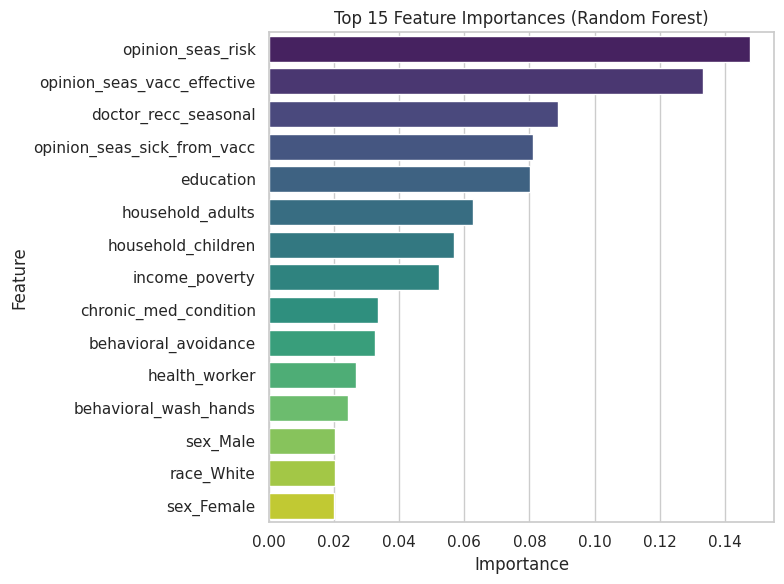

In [ ]:

#RANDOM FOREST EXPLAINABILITY (FEATURE IMPORTANCE + SHAP)


#Ensure we use the trained Random Forest pipeline
rf_model = rf_pipe.named_steps['model']

#FEATURE IMPORTANCE (Gini Importance)
#Get feature names from preprocessor
onehot_cols = []
if 'encoder' in rf_pipe.named_steps['preprocess'].named_transformers_['nom'].named_steps:
    encoder = rf_pipe.named_steps['preprocess'].named_transformers_['nom'].named_steps['encoder']
    onehot_cols = encoder.get_feature_names_out(rf_pipe.named_steps['preprocess'].transformers_[2][2])

#Combine all feature names
feature_names = []
for name, transformer, cols in rf_pipe.named_steps['preprocess'].transformers_:
    if name == 'nom':
        feature_names.extend(onehot_cols)
    else:
        feature_names.extend(cols)

#Match lengths safely
importances = rf_model.feature_importances_
fi_df = pd.DataFrame({'Feature': feature_names[:len(importances)],
                      'Importance': importances})
fi_df = fi_df.sort_values('Importance', ascending=False).head(15)

#Plot
plt.figure(figsize=(8,6))
sns.barplot(data=fi_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()



In [ ]:
#LOGISTIC REGRESSION TRAINING & EVALUATION

#Define and Train the Model
log_reg = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

log_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", log_reg)
])

log_pipe.fit(X_train, y_train)
print("Logistic Regression model training complete!\n")


Logistic Regression model training complete!



In [ ]:
#Evaluate on Validation Set
log_probs = log_pipe.predict_proba(X_valid)[:, 1]
log_preds = (log_probs >= 0.5).astype(int)

roc = roc_auc_score(y_valid, log_probs)
acc = accuracy_score(y_valid, log_preds)
f1 = f1_score(y_valid, log_preds)
prec = precision_score(y_valid, log_preds)
rec = recall_score(y_valid, log_preds)

print("LOGISTIC REGRESSION PERFORMANCE")
print(f"ROC-AUC: {roc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")

LOGISTIC REGRESSION PERFORMANCE
ROC-AUC: 0.8288
Accuracy: 0.7500
F1 Score: 0.7606
Precision: 0.7826
Recall: 0.7397


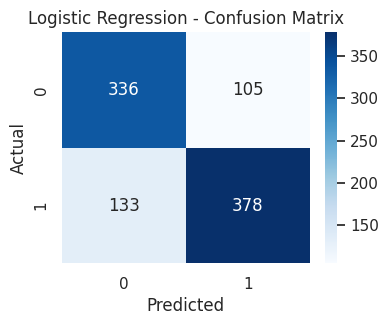

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_valid, log_preds)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


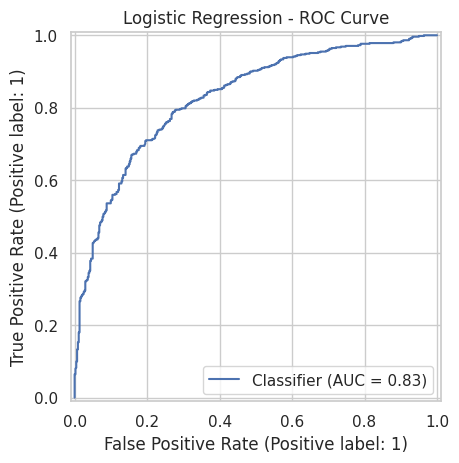

In [ ]:
#ROC Curve
RocCurveDisplay.from_predictions(y_valid, log_probs)
plt.title("Logistic Regression - ROC Curve")
plt.show()


In [ ]:
#Save Results in a DataFrame for Reference
log_results = pd.DataFrame({
    "Metric": ["ROC-AUC", "Accuracy", "F1", "Precision", "Recall"],
    "Score": [roc, acc, f1, prec, rec]
})
print("\n📋 Logistic Regression Evaluation Summary:")
display(log_results)


📋 Logistic Regression Evaluation Summary:


,Metric,Score
0,ROC-AUC,0.828758
1,Accuracy,0.750000
2,F1,0.760563
3,Precision,0.782609
4,Recall,0.739726


/tmp/ipython-input-2558145017.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


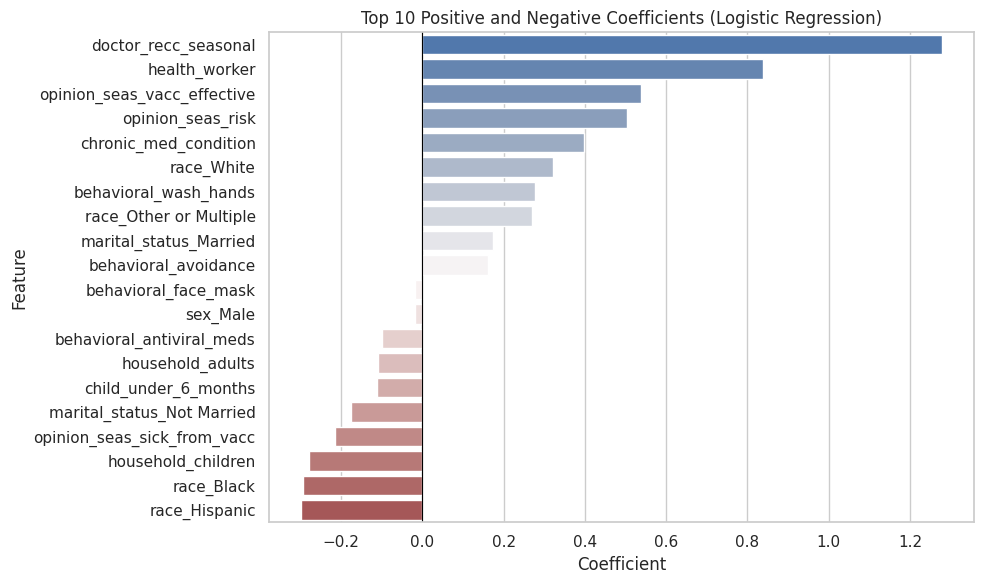


📋 Logistic Regression Coefficients Summary:


,Feature,Coefficient
19,doctor_recc_seasonal,1.278675
22,health_worker,0.838503
2,opinion_seas_vacc_effective,0.536958
3,opinion_seas_risk,0.502487
20,chronic_med_condition,0.398794
12,race_White,0.321994
18,behavioral_wash_hands,0.278213
11,race_Other or Multiple,0.269207
13,marital_status_Married,0.173904
16,behavioral_avoidance,0.161361


,Feature,Coefficient
13,marital_status_Married,0.173904
16,behavioral_avoidance,0.161361
6,income_poverty,0.055832
7,sex_Female,0.016747
5,education,0.016516
17,behavioral_face_mask,-0.017119
8,sex_Male,-0.018455
15,behavioral_antiviral_meds,-0.098822
1,household_adults,-0.108986
21,child_under_6_months,-0.112154


In [ ]:
#LOGISTIC REGRESSION FEATURE COEFFICIENTS



#Extract trained model and preprocessor
log_model = log_pipe.named_steps['model']
preprocessor_fitted = log_pipe.named_steps['preprocess']

#Get feature names after preprocessing
feature_names = []

for name, transformer, cols in preprocessor_fitted.transformers_:
    if name == 'nom':
        #Handle one-hot encoding
        encoder = transformer.named_steps['encoder']
        onehot_names = encoder.get_feature_names_out(cols)
        feature_names.extend(onehot_names)
    elif name == 'ord':
        feature_names.extend(cols)
    elif name == 'num' or name == 'bin':
        feature_names.extend(cols)

#Extract coefficients
coefficients = log_model.coef_.flatten()

coef_df = pd.DataFrame({
    'Feature': feature_names[:len(coefficients)],
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

#Plot Top 10 Positive & Negative Coefficients
plt.figure(figsize=(10,6))
sns.barplot(
    data=pd.concat([coef_df.head(10), coef_df.tail(10)]),
    x='Coefficient', y='Feature',
    palette='vlag'
)
plt.title('Top 10 Positive and Negative Coefficients (Logistic Regression)')
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

#Display Full Sorted Table for Reference
print("\n📋 Logistic Regression Coefficients Summary:")
display(coef_df.head(15))
display(coef_df.tail(15))
